# Project 3: Web APIs & Classification

*Update: Using lemmatizer and added stop words*

## Problem Statement



## Executive Summary



### Contents:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Pre-Processing](#Pre-Processing)
- [LogisticRegression Model](#LogisticRegression-Model)
- [Naive Bayes Model](#Naive-Bayes-Model)
- [Inferential Visualization](#Inferential-Visualization)
- [Business Recommendations](#Business-Recommendations)

## Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import eli5

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import feature_selection

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# display max columns
pd.set_option('display.max_columns',None)

%matplotlib inline

C:\Users\gchoo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\gchoo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


### AskMen

In [2]:
# Select neccesary columns

askmen = pd.read_csv('datasets/askmen.csv')
askmen = askmen[['subreddit','selftext','title']]
askmen.head()

,subreddit,selftext,title
0,AskMen,"Like, for real, it's fun.","Men of reddit who don't comment on posts, why ..."
1,AskMen,Background story: I've been dating my current ...,I cheated and I feel like crap. Not sure how t...
2,AskMen,NaN,I went to hug a girl and she grabbed my hand a...
3,AskMen,Basically it goes like this. Somebody posts a...,"Wanna play the, ""how filthy can we make this t..."
4,AskMen,"Sup, shitladies. We need to talk. \n\nI'm remo...","THERE WILL BE NO MORE ""HOW CAN I MAKE MY SO FE..."


In [3]:
askmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  925 non-null    object
 1   selftext   608 non-null    object
 2   title      925 non-null    object
dtypes: object(3)
memory usage: 21.8+ KB


In [4]:
askmen.isnull().sum()

subreddit      0
selftext     317
title          0
dtype: int64

In [5]:
askmen.shape

(925, 3)

### AskWomen

In [6]:
# Select neccesary columns

askwomen = pd.read_csv('datasets/askwomen.csv')
askwomen = askwomen[['subreddit','selftext','title']]
askwomen.head()

,subreddit,selftext,title
0,AskWomen,NaN,"As an introvert, how do you feel about this qu..."
1,AskWomen,NaN,"What is the most intimate, non-sex thing you d..."
2,AskWomen,NaN,"What do women do, that men would never think a..."
3,AskWomen,NaN,"Women who gave ""nice guys"" a chance how did it..."
4,AskWomen,"What made a guy once think you wanted him, whi...",What are some things that guys misinterpret fr...


In [7]:
askwomen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  925 non-null    object
 1   selftext   357 non-null    object
 2   title      925 non-null    object
dtypes: object(3)
memory usage: 21.8+ KB


In [8]:
askwomen.isnull().sum()

subreddit      0
selftext     568
title          0
dtype: int64

In [9]:
askwomen.shape

(925, 3)

## Data Cleaning

### AskMen

In [10]:
# Concat title with selftext 

askmen['selftext'] = askmen['selftext'].str.cat(askmen['title'],na_rep='')

In [11]:
askmen.head()

,subreddit,selftext,title
0,AskMen,"Like, for real, it's fun.Men of reddit who don...","Men of reddit who don't comment on posts, why ..."
1,AskMen,Background story: I've been dating my current ...,I cheated and I feel like crap. Not sure how t...
2,AskMen,I went to hug a girl and she grabbed my hand a...,I went to hug a girl and she grabbed my hand a...
3,AskMen,Basically it goes like this. Somebody posts a...,"Wanna play the, ""how filthy can we make this t..."
4,AskMen,"Sup, shitladies. We need to talk. \n\nI'm remo...","THERE WILL BE NO MORE ""HOW CAN I MAKE MY SO FE..."


In [12]:
# Askmen 

askmen.head()
askmen = askmen[['subreddit','selftext']]
askmen.head()

,subreddit,selftext
0,AskMen,"Like, for real, it's fun.Men of reddit who don..."
1,AskMen,Background story: I've been dating my current ...
2,AskMen,I went to hug a girl and she grabbed my hand a...
3,AskMen,Basically it goes like this. Somebody posts a...
4,AskMen,"Sup, shitladies. We need to talk. \n\nI'm remo..."


In [13]:
askmen.shape

(925, 2)

In [14]:
# Check for duplicates

askmen.duplicated(subset='selftext').sum()

0

In [15]:
# Check null values

askmen.isnull().sum()

subreddit    0
selftext     0
dtype: int64

### AskWomen

In [16]:
# Concat title with selftext 

askwomen['selftext'] = askwomen['selftext'].str.cat(askwomen['title'],na_rep = '')

In [17]:
# Askwomen 

askwomen.head()
askwomen = askwomen[['subreddit','selftext']]
askwomen.head()

,subreddit,selftext
0,AskWomen,"As an introvert, how do you feel about this qu..."
1,AskWomen,"What is the most intimate, non-sex thing you d..."
2,AskWomen,"What do women do, that men would never think a..."
3,AskWomen,"Women who gave ""nice guys"" a chance how did it..."
4,AskWomen,"What made a guy once think you wanted him, whi..."


In [18]:
# Check for duplicates

askwomen.duplicated(subset='selftext').sum()

3

In [19]:
# Drop Duplicates

askwomen.drop_duplicates(subset='selftext',inplace=True)
askwomen.shape

(922, 2)

In [20]:
# Check null values

askwomen.isnull().sum()

subreddit    0
selftext     0
dtype: int64

In [21]:
# Concat askmen and askwomen

df = pd.concat([askmen,askwomen],axis=0)

In [22]:
# reset index

df.reset_index(drop=True,inplace=True)

In [23]:
df.shape

(1847, 2)

## Pre-Processing

In [24]:
'''
Convert AskMen & AskWomen into binary labels:

0 for AskWomen
1 for AskMen
'''

df['subreddit'] = df['subreddit'].map({'AskMen': 1,'AskWomen': 0})

In [25]:
df.dtypes

subreddit     int64
selftext     object
dtype: object

In [26]:
df.head()

,subreddit,selftext
0,1,"Like, for real, it's fun.Men of reddit who don..."
1,1,Background story: I've been dating my current ...
2,1,I went to hug a girl and she grabbed my hand a...
3,1,Basically it goes like this. Somebody posts a...
4,1,"Sup, shitladies. We need to talk. \n\nI'm remo..."


In [27]:
# Baseline score

df['subreddit'].value_counts(normalize=True)

1    0.500812
0    0.499188
Name: subreddit, dtype: float64

In [28]:
X = df[['selftext']]
y = df['subreddit']

In [29]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [30]:
X_train.shape

(1292, 1)

In [31]:
X_test.shape

(555, 1)

In [32]:
# Check for HTML code artifacts

X_train['selftext'][1470]

"A common stereotype is men 'protecting' women - but have you ever been in a situation where you 'protected' a male from something/someone? What's your story?"

In [33]:
# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [34]:
# Create a function to clean selftext

def cleaning(text):
    
    # Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]"," ", text)

    # Convert to lower case and split into individual words
    words = letters_only.lower().split()
    
    # Lemmatizing of words
    lemmatized_words = [lemmatizer.lemmatize(w,pos='v') for w in words]
    
    words = " ".join(lemmatized_words)
    
    return words

In [35]:
# Initialize an empty list to hold the clean reviews.
X_train_clean = []
X_test_clean = []

# Instantiate the counter
counter = 0

# Run through each row in X_train selftext
for row in X_train['selftext']:
    
    # Clean the text and append to X_train_clean
    X_train_clean.append(cleaning(row))
    
    
# Run through each row in X_test selftest
for row in X_test['selftext']:
    
    # Clean the text and append to X_test_clean
    X_test_clean.append(cleaning(row))

## LogisticRegression Model

### Using CountVectorizer

In [36]:
# add subreddit name to english stopwords to better train model

from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["askmen","askwomen","men","women","ladies","guy","girl","did","ve","don","just"])

In [37]:
vec = CountVectorizer(stop_words=my_stop_words)

In [38]:
clf = LogisticRegression()

In [39]:
pipe_clf = make_pipeline(vec,clf)

In [40]:
# Hyperparameters

pipe_clf_params = {
    'countvectorizer__max_features': [1_000,1_500,2_000],
    'countvectorizer__min_df': [2, 3],
    'countvectorizer__max_df': [.9, .95],
    'countvectorizer__ngram_range': [(1,1), (1,2)]
}

In [41]:
# Instantiate GridSearchCV.

gs_clf = GridSearchCV(pipe_clf, 
                  param_grid=pipe_clf_params, 
                  cv=5)

In [42]:
# Fit GridSearch to training data.

gs_clf.fit(X_train_clean, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                 

In [43]:
# Gridsearch best score

gs_clf.best_score_

0.6756786687019244

In [44]:
# Get the best hyperparameters

gs_clf.best_params_

{'countvectorizer__max_df': 0.9,
 'countvectorizer__max_features': 2000,
 'countvectorizer__min_df': 2,
 'countvectorizer__ngram_range': (1, 1)}

In [45]:
# Save the best model 

gs_clf_model = gs_clf.best_estimator_

In [46]:
# Score model on training set

gs_clf_model.score(X_train_clean,y_train)

0.9434984520123839

In [47]:
# Score model on test set

gs_clf_model.score(X_test_clean,y_test)

0.6792792792792792

In [48]:
# Get top features in the model

eli5.show_weights(gs_clf_model.named_steps['logisticregression'], vec=gs_clf_model.named_steps['countvectorizer'], top=(10,10),target_names=y_test)

Weight?,Feature
+1.520,girlfriend
+1.244,equivalent
+1.233,advice
+1.171,enjoy
+1.168,wife
+1.109,big
+1.058,pussy
+1.054,help
+1.050,hand
+1.016,assume


- The train accuracy of the model is 93% and test accuracy is 73%. Hence the model is overfitted as the model has higher accuracy on the training set than the test set.

### Using TfidVectorizer

In [49]:
# Set up pipeline

tvec = TfidfVectorizer(stop_words=my_stop_words)

lr = LogisticRegression()

pipe_tvec = make_pipeline(tvec,lr)

In [50]:
# Set the pipe params

pipe_tvec_params = {
    'tfidfvectorizer__max_features': [500,1_000,1_500,2_000],
    'tfidfvectorizer__min_df': [2, 3],
    'tfidfvectorizer__max_df': [.9, .95],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2)]
}

In [51]:
# Instantiate GridSearchCV.

gs_tfid = GridSearchCV(pipe_tvec, 
                  param_grid=pipe_tvec_params, 
                  cv=5)

In [52]:
# Fit GridSearch to training data.

gs_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [53]:
# Gridsearch best score

gs_tfid.best_score_

0.691176558618419

In [54]:
# Get the best hyperparameters

gs_tfid.best_params_

{'tfidfvectorizer__max_df': 0.9,
 'tfidfvectorizer__max_features': 1500,
 'tfidfvectorizer__min_df': 3,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [55]:
# Save the best model 

gs_tfid_model = gs_tfid.best_estimator_

In [56]:
# Score model on training set

gs_tfid_model.score(X_train_clean,y_train)

0.8769349845201239

In [57]:
# Score model on testing set

gs_tfid_model.score(X_test_clean,y_test)

0.6990990990990991

In [58]:
# Predictions

predictions_tfid = gs_tfid_model.predict(X_test_clean)

In [59]:
# Generate a confusion matrix function

confusion_matrix(y_test,predictions_tfid)

array([[202,  78],
       [ 89, 186]], dtype=int64)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions_tfid).ravel()

In [61]:
# 
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))

True Negatives: 202
False Positives: 78
False Negatives: 89
True Positives: 186


In [62]:
# Get top features in the model

eli5.show_weights(gs_tfid_model.named_steps['logisticregression'], vec=gs_tfid_model.named_steps['tfidfvectorizer'], top=(10,10),target_names=y_test)

Weight?,Feature
+2.259,girlfriend
+1.585,wife
+1.534,advice
+1.502,say
+1.360,help
+1.306,old
+1.284,fuck
+1.230,post
+1.202,little
+1.188,hand


- The TfidfVectorizer has an train accuracy of 90% and test score of 74%. 
- The model is still overfitted.

## Naive Bayes Model

In [63]:
# Set up pipeline

tvec_nb = TfidfVectorizer(stop_words=my_stop_words)

nb = MultinomialNB()

pipe_nb = make_pipeline(tvec_nb,nb)

In [64]:
# Hyperparameters

pipe_nb_params = {
    'tfidfvectorizer__max_features': [1_000,1_500,2_000],
    'tfidfvectorizer__min_df': [2, 3],
    'tfidfvectorizer__max_df': [.9, .95],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2)],
    'multinomialnb__alpha': [1.0,1.5,2]
}

In [65]:
# Instantiate GridSearchCV.

gs_nb = GridSearchCV(pipe_nb, 
                  param_grid=pipe_nb_params, 
                  cv=5)

In [66]:
# Fit GridSearch to training data.

gs_nb.fit(X_train_clean, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [67]:
# Gridsearch best score

gs_nb.best_score_

0.6865074376702283

In [68]:
# Get the best hyperparameters

gs_nb.best_params_

{'multinomialnb__alpha': 1.0,
 'tfidfvectorizer__max_df': 0.9,
 'tfidfvectorizer__max_features': 1500,
 'tfidfvectorizer__min_df': 2,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [69]:
# Save the best model 

gs_nb_model = gs_nb.best_estimator_

In [70]:
# Score model on training set

gs_nb_model.score(X_train_clean,y_train)

0.8660990712074303

In [71]:
# Score model on test set

gs_nb_model.score(X_test_clean,y_test)

0.6810810810810811

In [72]:
# Predictions

predictions_nb = gs_nb_model.predict(X_test_clean)

In [73]:
# Generate a confusion matrix function

confusion_matrix(y_test,predictions_nb)

array([[177, 103],
       [ 74, 201]], dtype=int64)

In [74]:
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, predictions_nb).ravel()

In [75]:
print("True Negatives: " + str(tn_nb))
print("False Positives: " + str(fp_nb))
print("False Negatives: " + str(fn_nb))
print("True Positives: " + str(tp_nb))

True Negatives: 177
False Positives: 103
False Negatives: 74
True Positives: 201


In [76]:
#prob for positive class
pos_class_prob_sorted = gs_nb_model.named_steps['multinomialnb'].feature_log_prob_[1, :].argsort()
#prob for negative class
neg_class_prob_sorted = gs_nb_model.named_steps['multinomialnb'].feature_log_prob_[0, :].argsort()

#getting the top features 
neg_top_features = np.take(gs_nb_model.named_steps['tfidfvectorizer'].get_feature_names(), neg_class_prob_sorted)
pos_top_features = np.take(gs_nb_model.named_steps['tfidfvectorizer'].get_feature_names(), pos_class_prob_sorted)

In [77]:
# Top 10 positive and negative features

print(f'positive: {pos_top_features[:-11:-1]}')
print(f'negative: {neg_top_features[:-11:-1]}')

positive: ['like' 'make' 'feel' 'edit' 'think' 'say' 'know' 'time' 'want' 'date']
negative: ['partner' 'feel' 'like' 'make' 'love' 'relationship' 'think' 'reddit'
 'thing' 'people']


- The Naive Bayes model return an lower train accuracy of 88% and test accuracy of 71%. 
- The Naive Bayes model is overfitted too
- Perhaps we can look into removing some top words like men, women, guys, ladies to reduce overfitting.

## Inferential Visualization

- Here we will compare the sensitivity, specificity and ROC curve of the two models.
- *Precision 
- *Recall

### Top 10 askmen & askwomen words

![](./image/capture.png)

### Naive Bayes

In [78]:
# Specificity of Naive Bayes Model

spec_nb = tn_nb / (tn_nb + fp_nb)

print(f'Specificity: {round(spec_nb,4)}')

Specificity: 0.6321


In [79]:
# Sensitivity of Naive Bayes Model

sens_nb = tp_nb / (tp_nb + fn_nb)

print(f'Sensitivity: {round(sens_nb,4)}')

Sensitivity: 0.7309


In [80]:
# Precision of Naive Bayes Model

prec_nb = tp_nb / (tp_nb + fp_nb)

print(f'Precision: {round(prec_nb,4)}')

Precision: 0.6612


In [81]:
pred_proba = [i[1] for i in gs_nb_model.predict_proba(X_test_clean)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs' : pred_proba})

pred_df.head()

,true_values,pred_probs
1574,0,0.679987
1720,0,0.447972
1510,0,0.334773
1615,0,0.331239
1325,0,0.283247


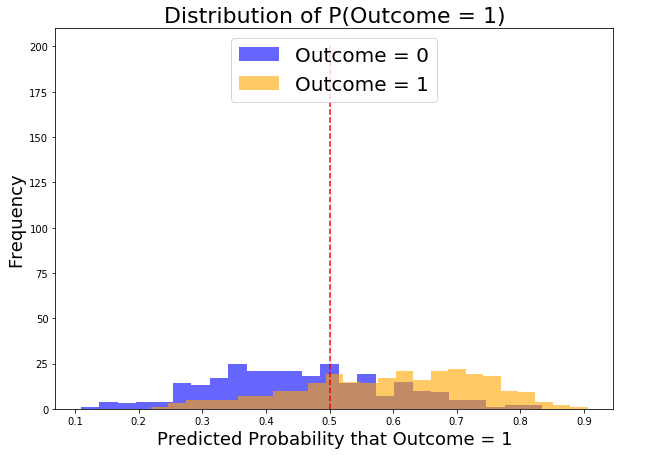

In [82]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 200,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.00, 50),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.01, 10),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.95, 50),
             s = 'TP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20, loc='upper center');

In [83]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.7582987012987014

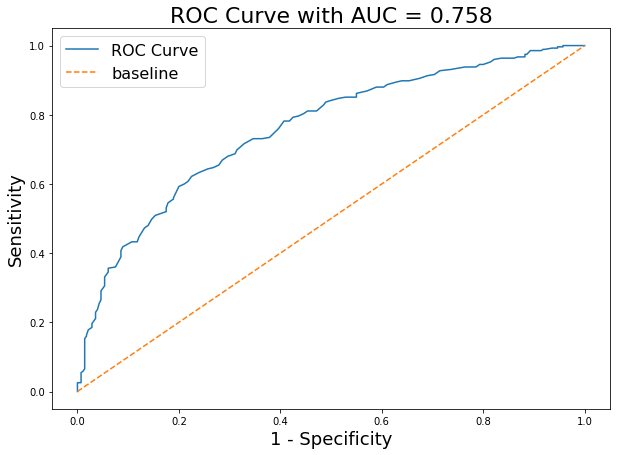

In [84]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Inference 

- The ROC curve shows sensitivity (True positive rate) against specificity (1 - False positive rate). 

- Using Naive Bayes model, the sensitivity is calculated to be 0.65 and specificity to be 0.78. 

- Precision of 0.68 shows the 68% of Askmen that were correctly classified

### Logistic Regression

In [85]:
# Specificity of logistic Model

spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.7214


In [86]:
# Sensitivity of logistic Model

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.6764


In [87]:
pred_proba_lr = [i[1] for i in gs_tfid_model.predict_proba(X_test_clean)]

pred_df_lr = pd.DataFrame({'true_values': y_test,
                        'pred_probs' : pred_proba_lr})

pred_df_lr.head()

,true_values,pred_probs
1574,0,0.588297
1720,0,0.489813
1510,0,0.323082
1615,0,0.330565
1325,0,0.319180


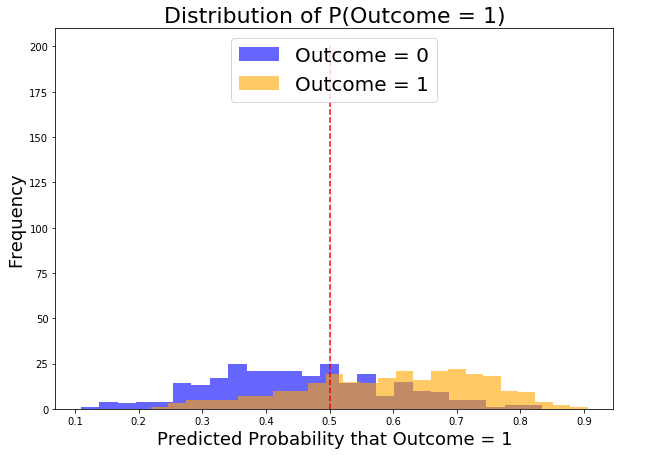

In [88]:
#Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df_lr['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df_lr['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 200,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.00, 50),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.01, 10),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.95, 50),
             s = 'TP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20, loc='upper center');

In [89]:
# ROC score 

roc_auc_score(pred_df_lr['true_values'], pred_df_lr['pred_probs'])

0.7617792207792207

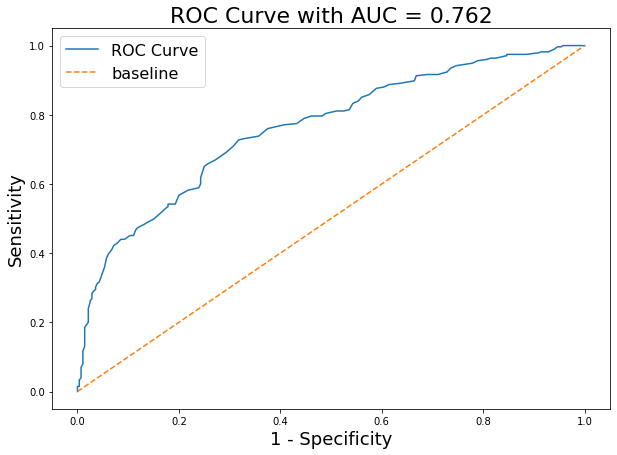

In [90]:
# Plot ROC Chart

# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_lr, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_lr, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df_lr["true_values"], pred_df_lr["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Inference

The Logistic Regression is a better predictive model to use for this case as the AUC of the ROC is greater than the Naive Bayes model. 